### Trackpy Package Tutorial (Experiment)

The trial tutorial is for a single movie. To analyze an entire experiment, which consists of multiple movies/trials, use the Experiment class

In [15]:
import os

import matplotlib.pyplot as plt
import numpy as np

from trackpy_package import Experiment

Create the experiment object by specifying the path to the folder. You should just be able to download the drive folder (`2um_25`, for example) and set the path to it and everything should load correctly. Try not to change filenames of anything since it might break the code

In [2]:
cwd = os.getcwd() # Get path to directory that this notebook is being run in
experiment_path = os.path.join(cwd, '2um_25') # Create path to experiment folder, which contains trial folders
dat = Experiment(experiment_dir_path=experiment_path, microns_per_pixel=0.197)

The `Experiment` object should have automatically loaded in all the trial sub-directories into a dictionary, which is stored in a class attribute called `trials`. Check to see if it worked

In [3]:
dat.trials.keys()

dict_keys(['2um_5', '2um_2', '2um_3', '2um_4', '2um_8', '2um_1', '2um_6', '2um_7', '2um_9', '2um_10'])

As expected, our `2um_25` experiment has 10 trials. You can access any trial by using the key as an index into the dictionary

In [4]:
dat.trials['2um_5']

{'trial': <trackpy_package.Trial at 0x10657ea90>,
 'diameter': None,
 'minmass': None,
 'search_range': 10}

Each value associated with the trial name has 4 parameters:
1. `trial`: The actual python `Trial` object
2. `diameter`: The diameter used to locate the particles for this trial
3. `minmass`: The minmass used to locate the particles for this trial
4. `search_range`: The search range used to track particles (default 10)

Note that `diameter` and `minmass` are `None`. We will need to find these for each trial

You can look for optimal parameters (manually) in the same was as the Trial tutorial:

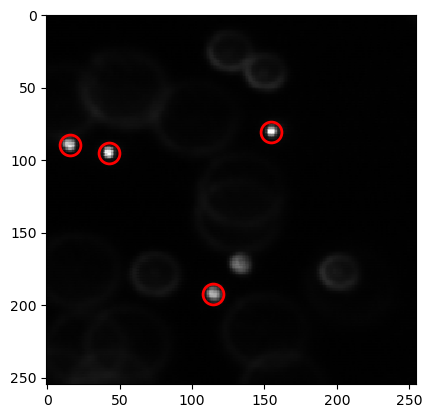

In [5]:
dat.trials['2um_1']['trial'].locate(frame_num=1, diameter=13, minmass=2900)

I've wrapped all of this functionality in a function on `Experiment` directly, which should be faster. This function will automatically update the `diameter` and `minmass` parameters in the dictionary to whatever you pass through, so call this until you find the right values and then you can move on to the next trials

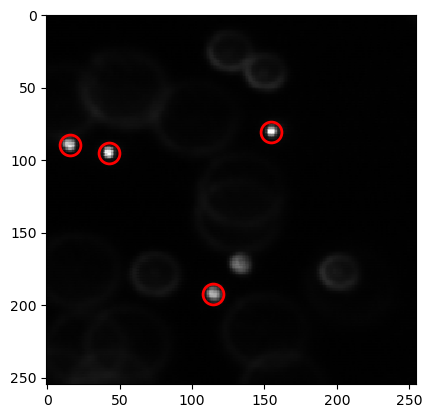

In [6]:
dat.locate(
    trial_name='2um_1',
    frame_num=1,
    diameter=13,
    minmass=2900
)

In [7]:
dat.trials['2um_1'] # diameter and minmass should be updated to last passed value

{'trial': <trackpy_package.Trial at 0x10657e9a0>,
 'diameter': 13,
 'minmass': 2900,
 'search_range': 10}

Setting all trials to same parameters for now

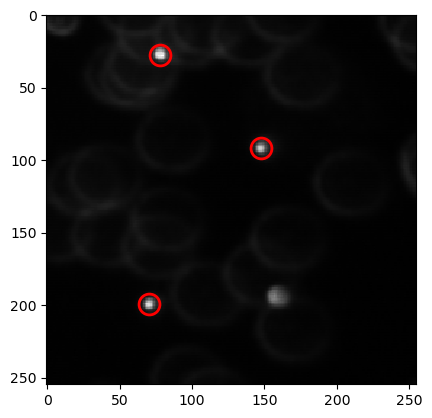

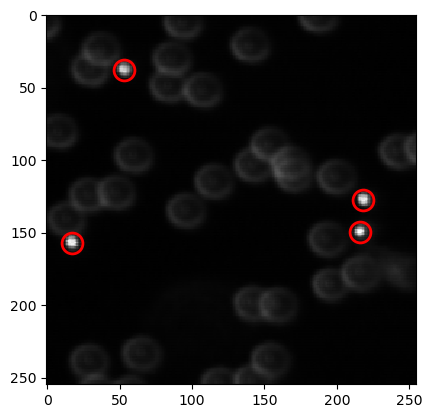

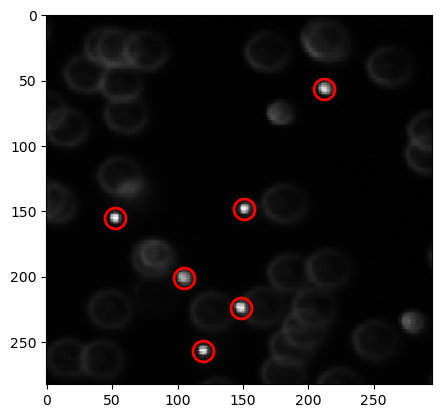

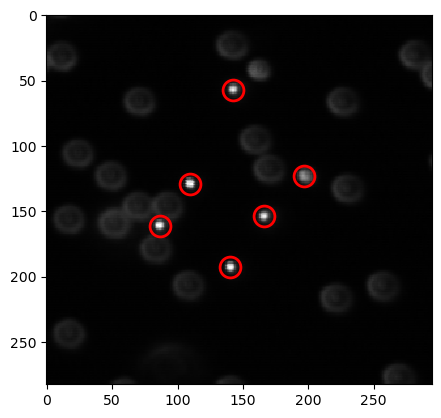

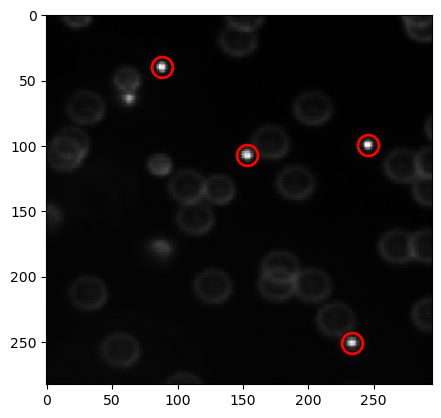

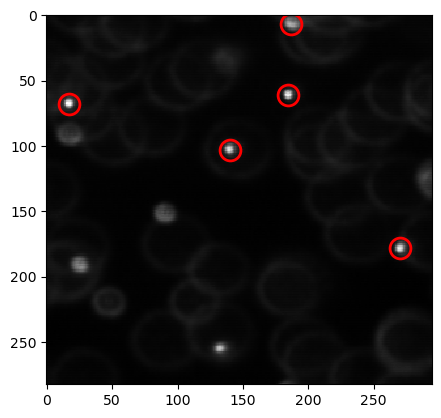

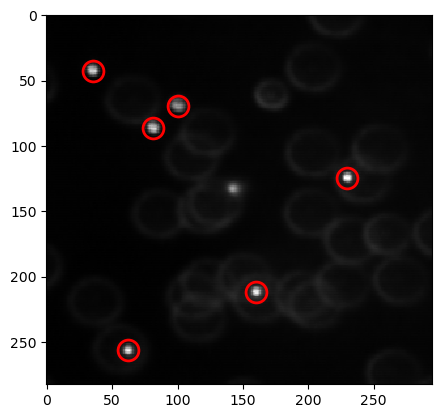

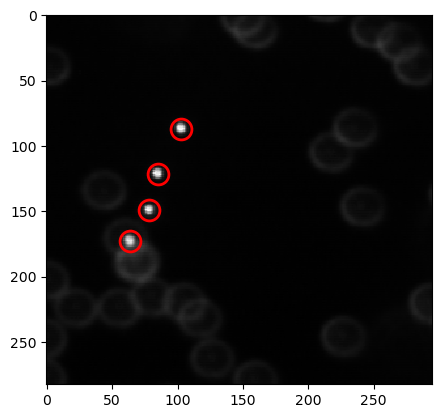

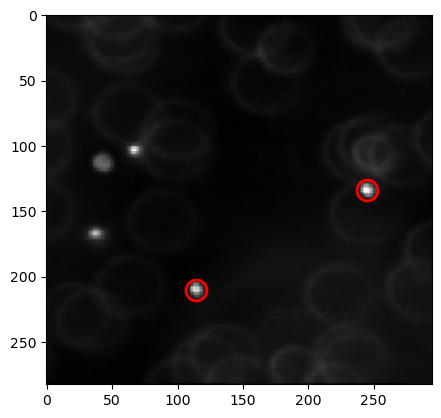

In [8]:
dat.locate(
    trial_name='2um_2',
    frame_num=1,
    diameter=13,
    minmass=2900
)
dat.locate(
    trial_name='2um_3',
    frame_num=1,
    diameter=13,
    minmass=2900
)
dat.locate(
    trial_name='2um_4',
    frame_num=1,
    diameter=13,
    minmass=2900
)
dat.locate(
    trial_name='2um_5',
    frame_num=1,
    diameter=13,
    minmass=2900
)
dat.locate(
    trial_name='2um_6',
    frame_num=1,
    diameter=13,
    minmass=2900
)
dat.locate(
    trial_name='2um_7',
    frame_num=1,
    diameter=13,
    minmass=2900
)
dat.locate(
    trial_name='2um_8',
    frame_num=1,
    diameter=13,
    minmass=2900
)
dat.locate(
    trial_name='2um_9',
    frame_num=1,
    diameter=13,
    minmass=2900
)
dat.locate(
    trial_name='2um_10',
    frame_num=1,
    diameter=13,
    minmass=2900
)

Once all `diameter` and `minmass` are filled for each trial, call `batch_all()` to call batch on all trials.

In [9]:
dat.batch_all()

Frame 37: 3 features
Success!


Then call `link_all()` to track particle trajectories for each trial

In [10]:
dat.link_all()

Frame 37: 3 trajectories present.
Success!


We can plot the trajectory for a trial using `plot_traj()`

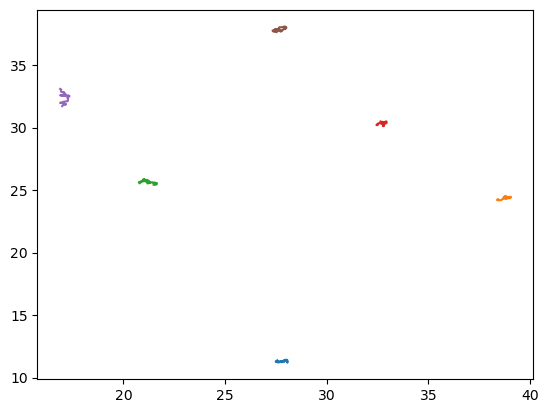

In [11]:
dat.plot_traj_trial('2um_5')

Looks reasonable. We can also plot trajectories for all trials

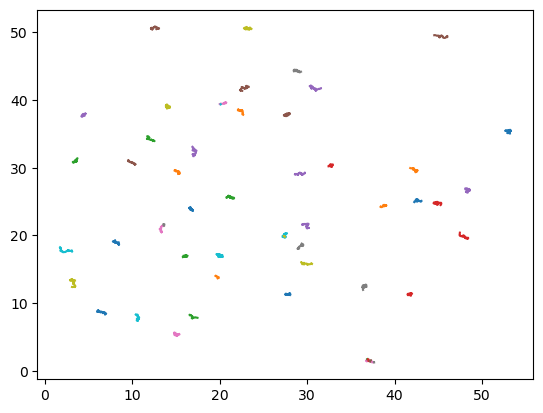

In [12]:
dat.plot_traj_all()

Get diffusion coefficient of each particle in a trial using below function

In [22]:
diffs_2um_5 = dat.get_diffusion_coefficient_trial('2um_5')
diffs_2um_5

[(9.151776441647667e-15, 1.5013944204544871e-15),
 (9.41580625831559e-15, 1.2375582369551244e-15),
 (1.1351571564301377e-14, 1.709812390806798e-15),
 (8.714457660166709e-15, 1.176829432709115e-15),
 (1.2175327934731105e-14, 2.249156360637217e-15),
 (1.141326055930016e-14, 1.7742768395812534e-15)]

Taking average, we can see that this code calculates the diffusion coefficient better than the built in code, which reported
$D=2.236\times 10^{-13}$ ($D_{expected}=8.58657895\times10^{-15}$)

In [23]:
diff_avg = np.mean([d[0] for d in diffs_2um_5])
diff_avg

1.0370366736410435e-14